# IT-Management visualisation with Telekom dataset

This is a Jupyter notebook for visualising the Telekom dataset. The dataset contains information about customers and their usage of telecommunications services. The goal is to explore the data and create visualisations to gain insights into customer behaviour.

The dataset and code can be found here: https://www.kaggle.com/datasets/blastchar/telco-customer-churn/data

### Import packages and configuration

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

### Read data and display first 5 rows

In [23]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Data exploration

In [24]:
data.shape

(7043, 21)

In [25]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Check for null values

In [27]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

No null values present in the dataset.

In [28]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.00,0.16,0.37,0.00,0.00,0.00,0.00,1.00
tenure,7043.00,32.37,24.56,0.00,9.00,29.00,55.00,72.00
MonthlyCharges,7043.00,64.76,30.09,18.25,35.50,70.35,89.85,118.75


- The dataset has too many features with text data and are probably categorical features!
- Total Charges is a feature with numerical values but are stored in string datatype. First, we will convert this column into float.

In [29]:
# Converting DataFrame column elements from string to float using the following code line :
# data['TotalCharges'] = data['TotalCharges'].astype(float)

l1 = [len(i.split()) for i in data['TotalCharges']]
l2 = [i for i in range(len(l1)) if l1[i] != 1]
print('Index Positions with empty spaces : ',*l2)

for i in l2:
    data.loc[i,'TotalCharges'] = data.loc[(i-1),'TotalCharges']

data['TotalCharges'] = data['TotalCharges'].astype(float)
data.drop(columns = ['customerID'], inplace = True)

Index Positions with empty spaces :  488 753 936 1082 1340 3331 3826 4380 5218 6670 6754


- While converting the TotalCharges to float, an error occurred with the message describing that it could not convert string to float.
This message popped up because of the empty strings present in the above displayed index positions of the TotalCharges column. As these elements were defined as string, they did not appear as Null values and hence the heatmap for missing values did not display anything.
    - E.g : a = ' '
- Hence, we split the individual elements of TotalCharges and store the index values of the elements whose splitted string length is not equal to 1.
- This created a list with index numbers of the empty strings which are filled with their preceding value and finally the entire column is converted into float using astype function.
- We drop the customerID column as well!
- Let's divide the features into numerical and categorical features.
- We will also execute the label encoding transformation for categorical features.

In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df1 = data.copy(deep = True)
text_data_features = [i for i in list(data.columns) if i not in list(data.describe().columns)]

print('Label Encoder Transformation')
for i in text_data_features :
    df1[i] = le.fit_transform(df1[i])
    print(i,' : ',df1[i].unique(),' = ',le.inverse_transform(df1[i].unique()))

Label Encoder Transformation
gender  :  [0 1]  =  ['Female' 'Male']
Partner  :  [1 0]  =  ['Yes' 'No']
Dependents  :  [0 1]  =  ['No' 'Yes']
PhoneService  :  [0 1]  =  ['No' 'Yes']
MultipleLines  :  [1 0 2]  =  ['No phone service' 'No' 'Yes']
InternetService  :  [0 1 2]  =  ['DSL' 'Fiber optic' 'No']
OnlineSecurity  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
OnlineBackup  :  [2 0 1]  =  ['Yes' 'No' 'No internet service']
DeviceProtection  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
TechSupport  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingTV  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingMovies  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
Contract  :  [0 1 2]  =  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  :  [1 0]  =  ['Yes' 'No']
PaymentMethod  :  [2 3 0 1]  =  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn  :  [0 1]  =  ['No' 'Yes']


- We creating a deep copy of the original dataset and label encoding the text data.
- Modifications in the original dataset will not be highlighted in this deep copy.
- Hence, we use this deep copy of dataset that has all the features converted into numerical values for visualization & modeling purposes.
- We now again the descriptive stats of the data.

In [31]:
df1.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00
mean,0.50,0.16,0.48,0.30,32.37,0.90,0.94,0.87,0.79,0.91,0.90,0.80,0.99,0.99,0.69,0.59,1.57,64.76,2285.17,0.27
std,0.50,0.37,0.50,0.46,24.56,0.30,0.95,0.74,0.86,0.88,0.88,0.86,0.89,0.89,0.83,0.49,1.07,30.09,2267.54,0.44
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,18.25,18.80,0.00
25%,0.00,0.00,0.00,0.00,9.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,35.50,401.68,0.00
50%,1.00,0.00,0.00,0.00,29.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,2.00,70.35,1398.25,0.00
75%,1.00,0.00,1.00,1.00,55.00,1.00,2.00,1.00,2.00,2.00,2.00,2.00,2.00,2.00,1.00,1.00,2.00,89.85,3803.05,1.00
max,1.00,1.00,1.00,1.00,72.00,1.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,1.00,3.00,118.75,8684.80,1.00


### Mean values of all the features for churned and not-churned customers.

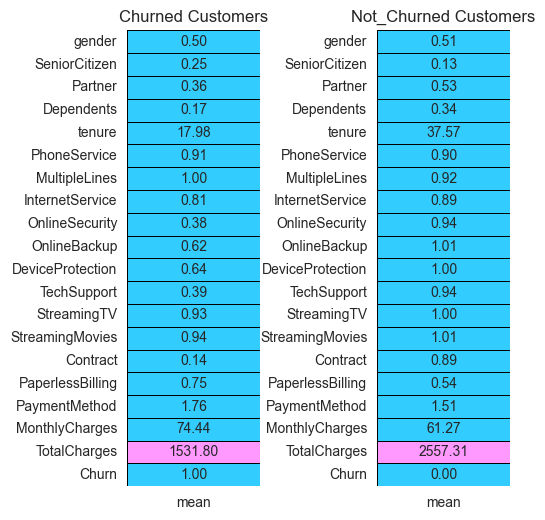

In [32]:
colors = ['#33ccff','#ff99ff']

churn = df1[df1['Churn'] == 1].describe().T
not_churn = df1[df1['Churn'] == 0].describe().T

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,5))
plt.subplot(1,2,1)
sns.heatmap(churn[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Churned Customers');

plt.subplot(1,2,2)
sns.heatmap(not_churn[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f',)
plt.title('Not_Churned Customers');

fig.tight_layout(pad = 0)

plt.show()
plt.close()

- Clearly, the customers that churned had a low mean tenure of 17.98 months as compared to those who continued with an average tenure period of 37.57 months.
- Mean values of OnlineSecurity, OnlineBackup, DeviceProtection and TechSupport are higher for not-churned customers than churn customers. This can serve as a good indicator or point to focus on!
- Churned customer's Contract value is much smaller than those of not-churned customers.
- Mean MonthlyCharges of the churn customers, 74.44, is more than that of not-churn customers, 61.27.
- Not-churned customers TotalCharges, 2557.31, is higher than churn customers, 1531.80.
- From these mean values, we can say that some of the features display a clear cut difference that can help to focus more churn customers to make sure they retain the services.
- The dataset has too many categorical features, hence mean values of the features are present in the vicinity of 0.

## Exploratory Data Analysis

### Dividing features into Numerical and Categorical:

In [33]:
col = list(df1.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(data[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : gender SeniorCitizen Partner Dependents PhoneService MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies Contract PaperlessBilling PaymentMethod Churn
Numerical Features : tenure MonthlyCharges TotalCharges


### Target Variable Visualization (Churn):

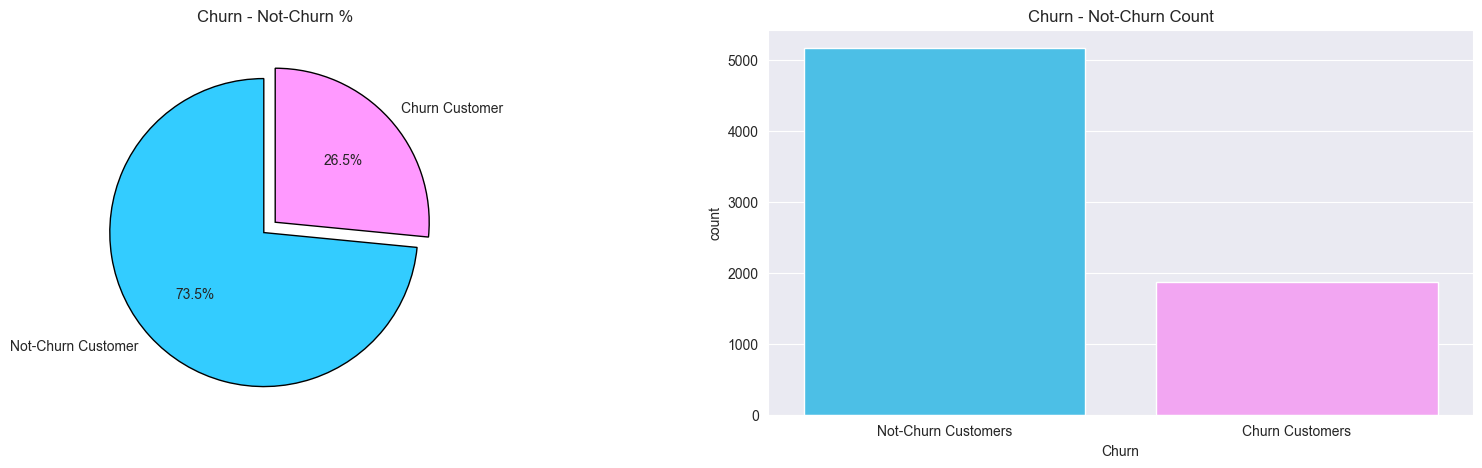

In [34]:
l = list(df1['Churn'].value_counts())
circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]

fig = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))
plt.subplot(1,2,1)
plt.pie(circle,labels = ['Not-Churn Customer','Churn Customer'],autopct = '%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Churn - Not-Churn %');

plt.subplot(1,2,2)
ax = sns.countplot(x = 'Churn',data = data,palette = colors)
plt.title('Churn - Not-Churn Count');
ax.set_xticklabels(['Not-Churn Customers','Churn Customers'])

plt.show()
plt.close()


- The dataset is unbalanced in a near about 3 : 1 ratio for Not-Churn : Churn customers!
- Due to this, predictions will be biased towards Not-Churn customers.
- Visualizations will also display this bias!

### Create customer groups

In [35]:
l1 = ['gender','SeniorCitizen','Partner','Dependents'] # Customer Information
l2 = ['PhoneService','MultipleLines','InternetService','StreamingTV','StreamingMovies',
      'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport'] # Services Signed Up for!
l3 = ['Contract','PaperlessBilling','PaymentMethod'] # Payment Information

### Visualisation of Customer Information and Churn

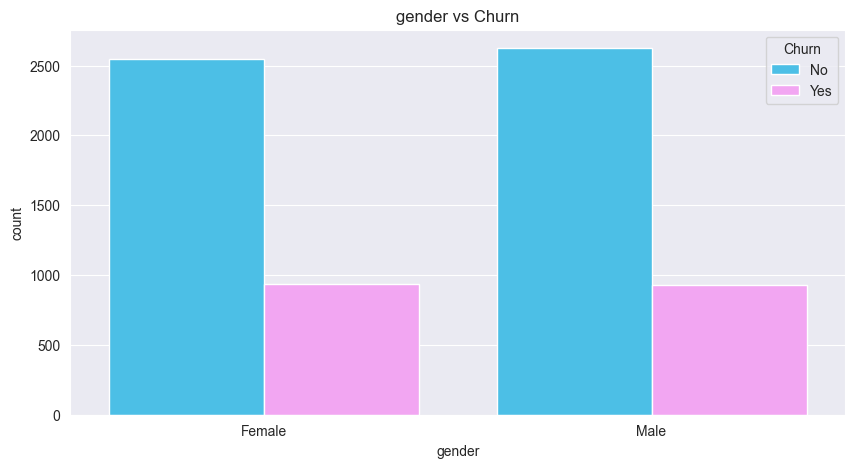

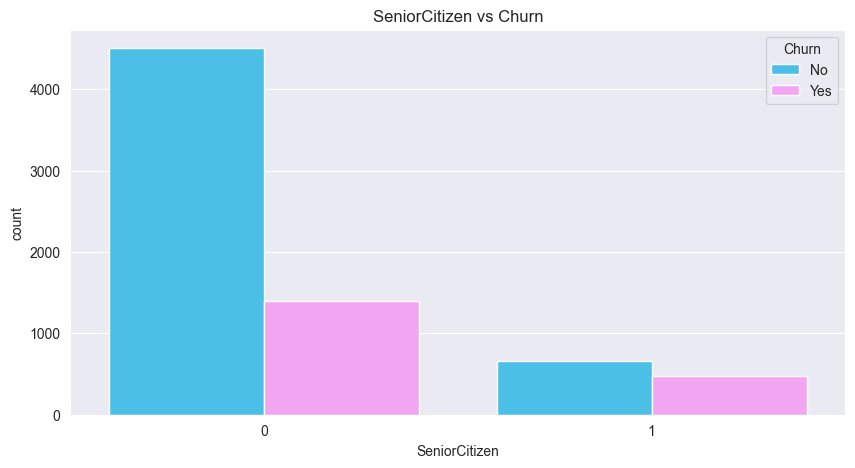

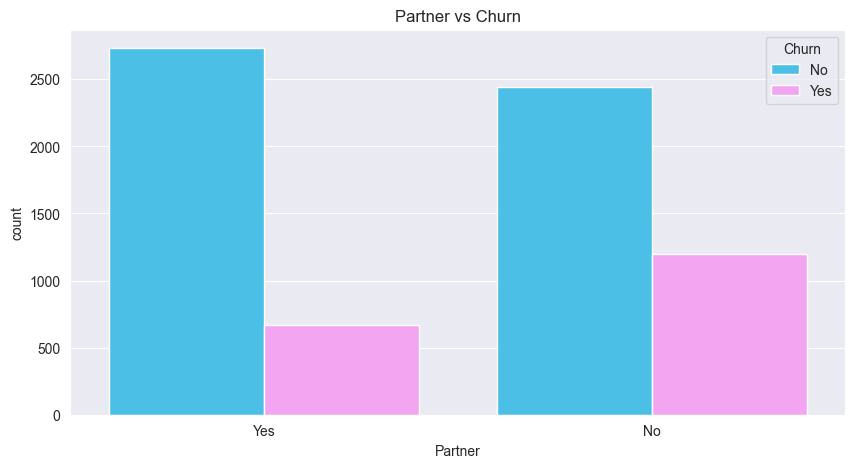

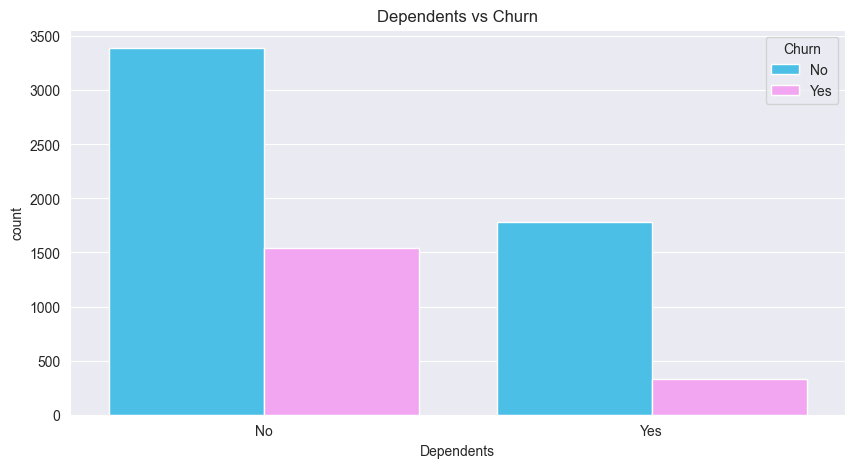

In [36]:
for i in l1:
    fig = plt.figure(figsize = (10,5))
    ax = sns.countplot(x = i,data = data,hue = 'Churn',palette = colors)
    plt.title(i + ' vs Churn')

    plt.show()
    plt.close()


- Customer churning for male & female customers is very similar to each other!
- Similarly, number of SeniorCitizen customers is pretty low! Out of that, we can observe a near about 40% churn of SeniorCitizen customers. It accounts for a total of 476 customers out of 1142 Senior Citizen customers.
- Customers who are housing with a Partner churned less as compared to those not living with a Partner.
- Similary, churning is high for the customers that don't have Dependents with them!

### Visualisation of Services Signed Up for and Churn

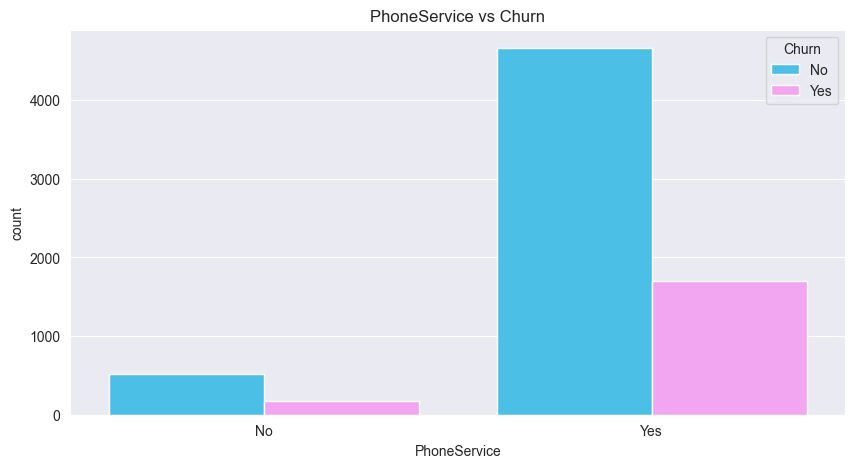

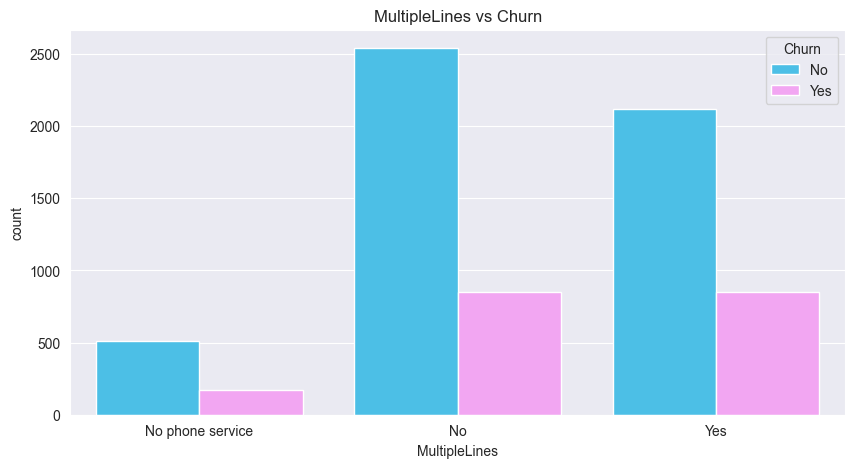

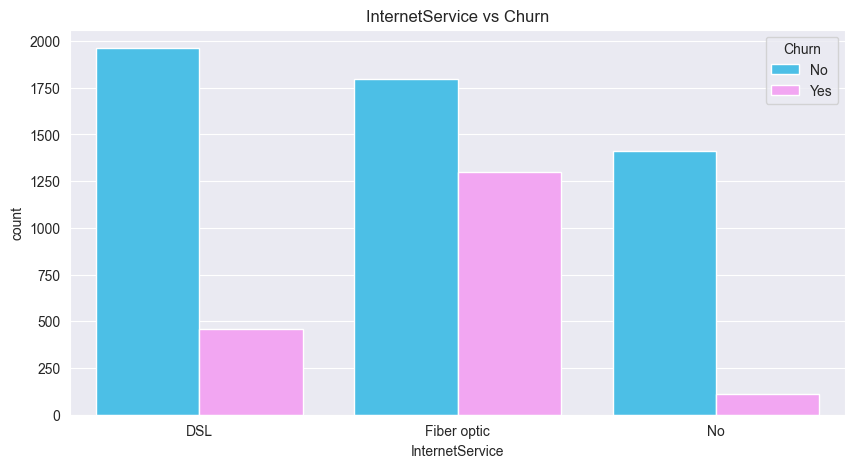

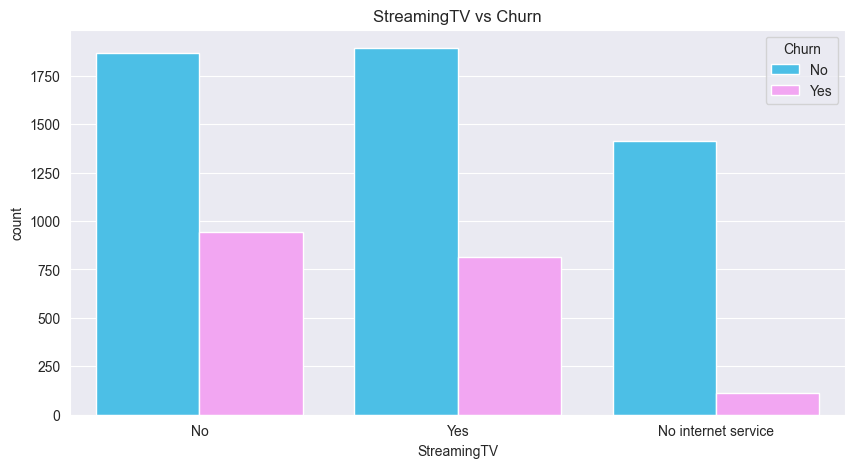

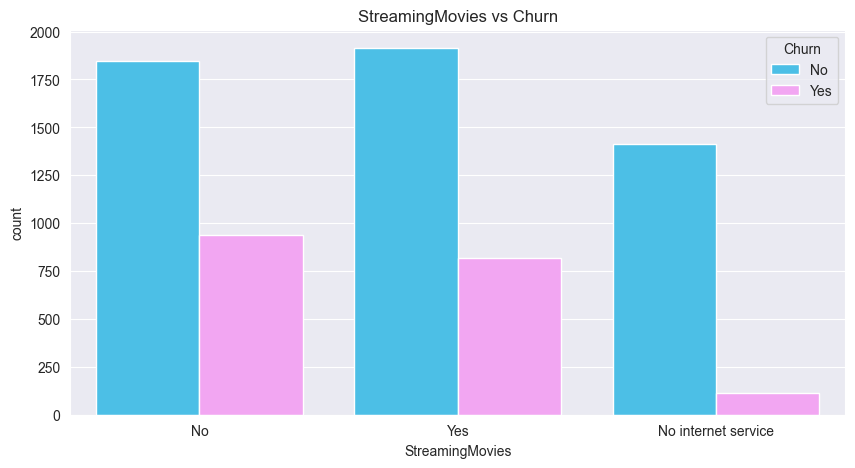

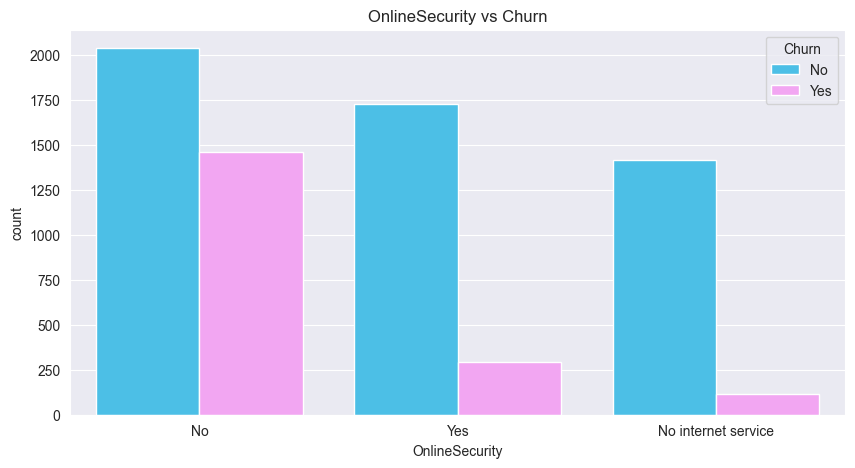

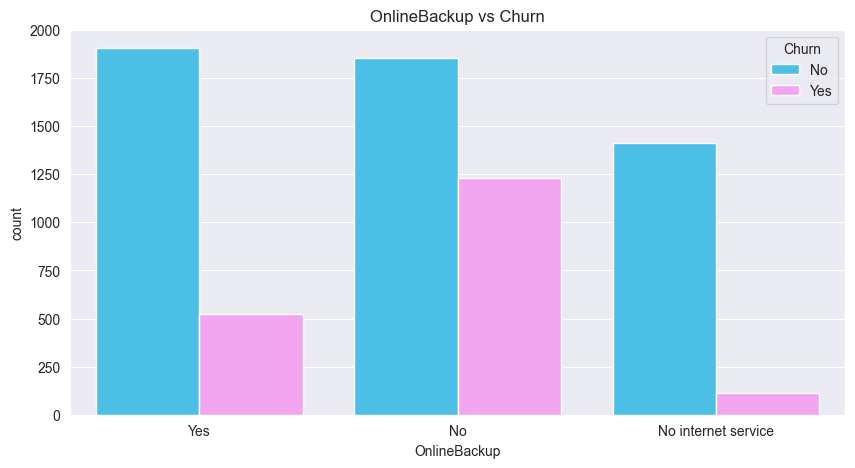

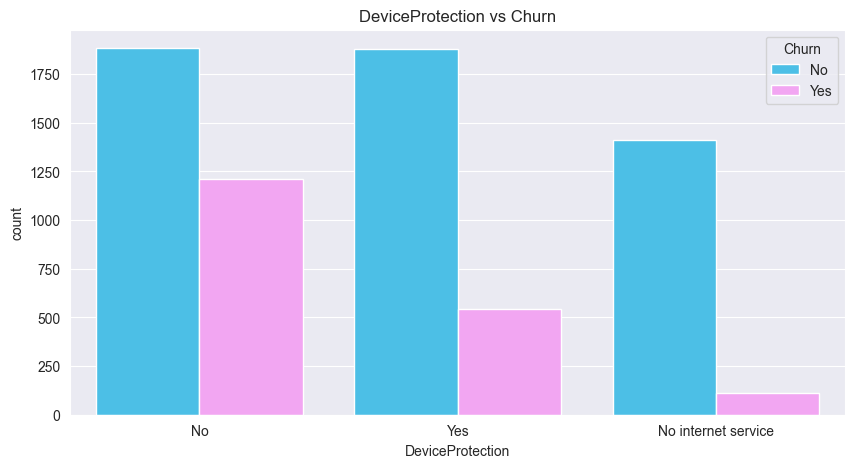

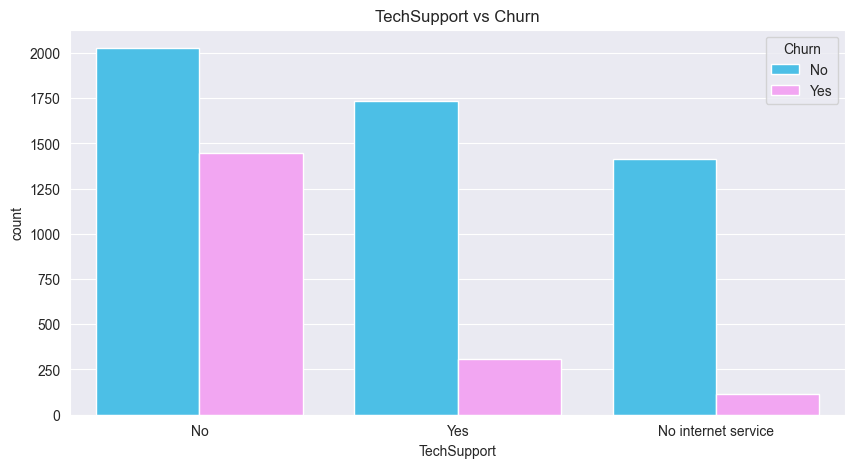

In [37]:
for i in l2:
    fig = plt.figure(figsize = (10,5))
    ax = sns.countplot(x = i,data = data,hue = 'Churn',palette = colors)
    plt.title(i + ' vs Churn')

    plt.show()
    plt.close()

- For PhoneService, despite having no phone service, more customers were retained as compared to the number of customers who dropped the services.
- In case of MultipleLines, churn rate in when the Multiplelines are present or not is the same.
- A high number of customers have displayed their resistance towards the use of Fiber optic cables for providing the InternetService. On the contrary, from the above graph, customers prefer using DSL for their InternetService!
- StreamingTV and StreamingMovies display an identical graph. Irrespective of being subscribed to StreamingTV & StreamingMovies, a lot of customers have been churned. Looks like the streaming content was not entirely at fault!

### Visualisation of Payment Information and Churn

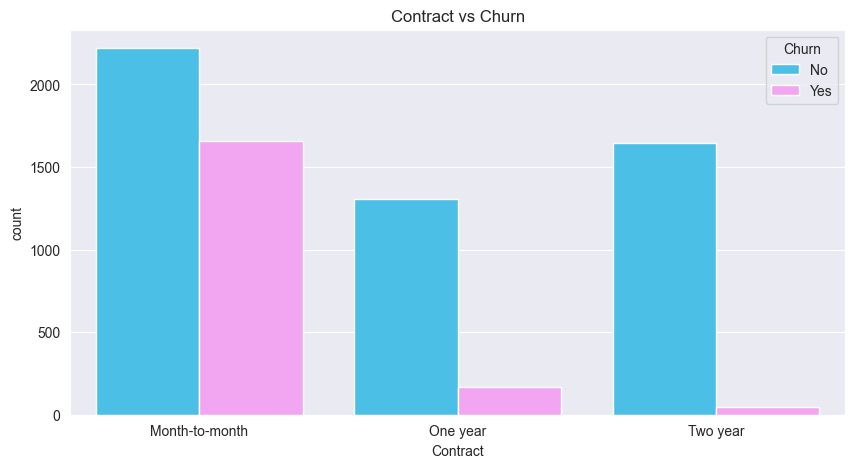

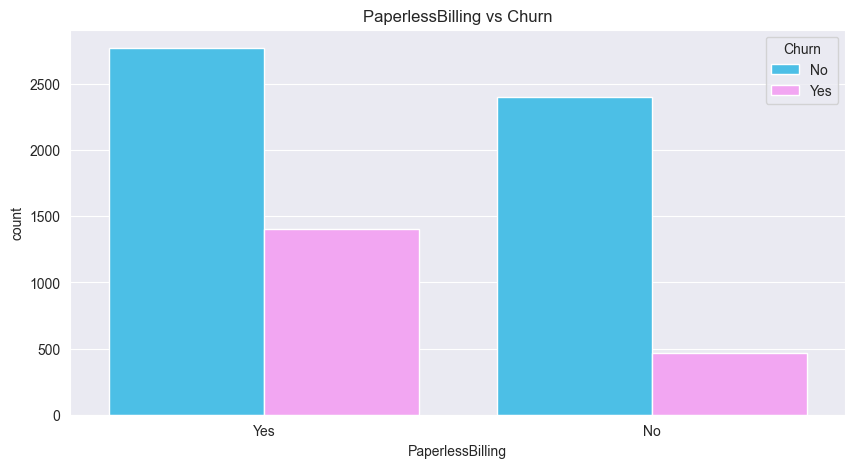

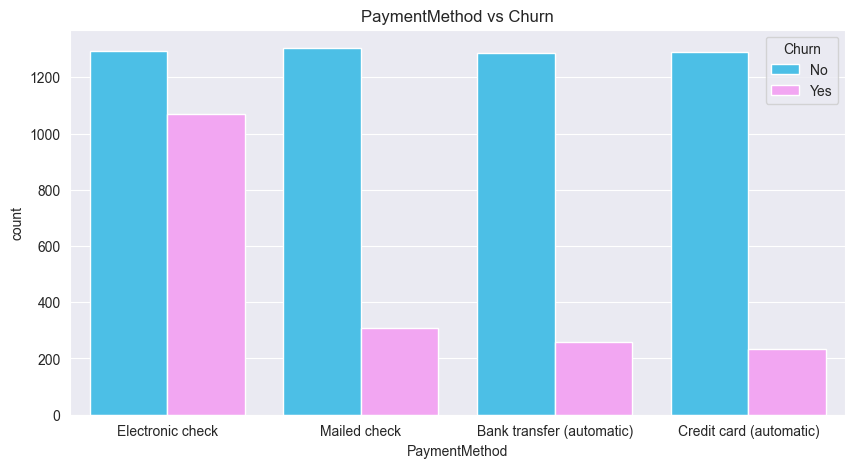

In [38]:
for i in l3:
    fig = plt.figure(figsize = (10,5))
    ax = sns.countplot(x = i,data = data,hue = 'Churn',palette = colors)
    plt.title(i + ' vs Churn')

    plt.show()
    plt.close()

- Customer churning for a Month-to-Month based Contract is quite high. This is probably because the customers are testing out the varied services available to them and hence, in order to save money, 1 month service is tested out!
- Another reason can be the overall experience with the internet service, streaming service and phone service were not consistent. Every customer has a different priority and hence if one of the 3 was upto par, the entire service was cutoff!
- PaperlessBilling displays a high number of customers being churned out. This is probably because of some payment issue or receipt issues.
- Customers clearly resented the Electronic check PaymentMethod. Out of the 2365 number of bills paid using Electronic check, a staggering 1071 customers exited the pool of service due to this payment method. Company definitely needs to either drop Electronic check method or make it hassle-free and user-friendly.

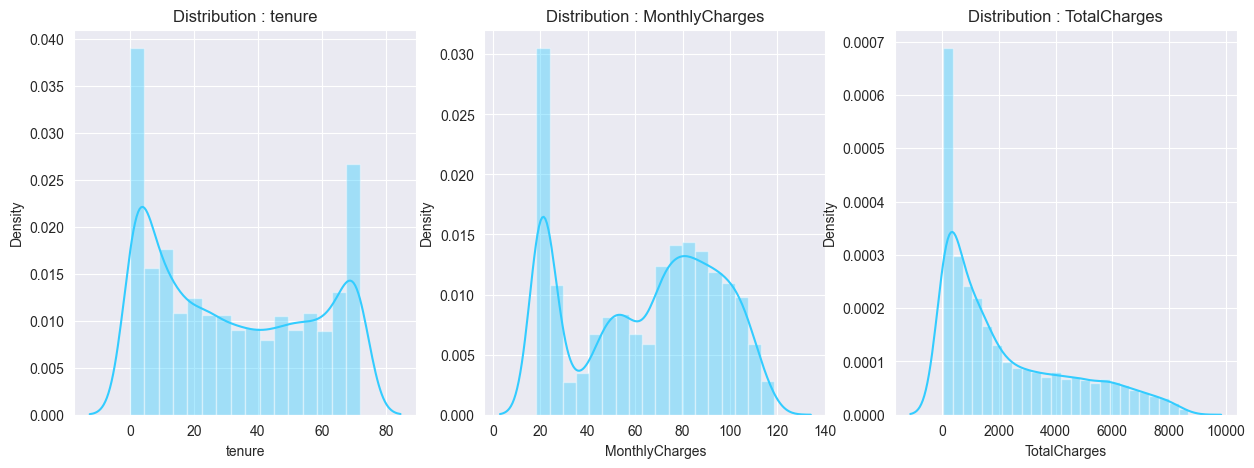

In [39]:
fig, ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(len(numerical_features)):
    plt.subplot(1,3,i+1)
    sns.distplot(df1[numerical_features[i]],color = colors[0])
    title = 'Distribution : ' + numerical_features[i]
    plt.title(title)
plt.show()

- The distribution of the numerical features is not normal. The distribution of MonthlyCharges and TotalCharges is right-skewed, while the distribution of Tenure is left-skewed.
- the longer the customer has been with telekom, the more likely they are not to churn.

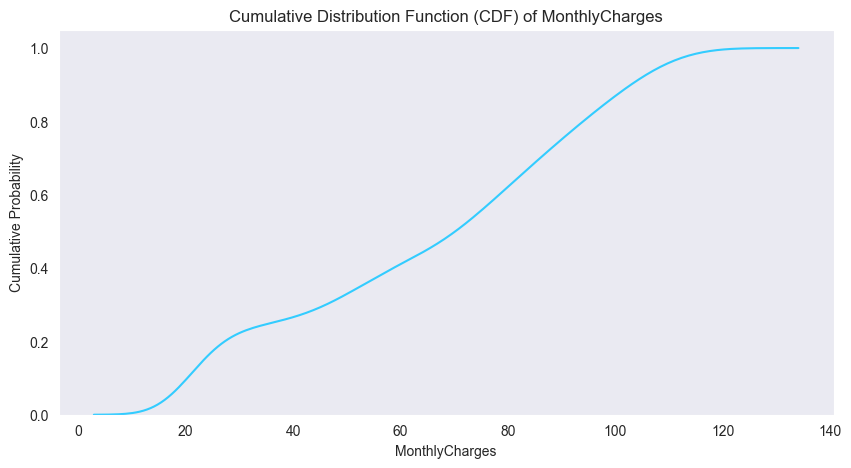

In [40]:
def plot_cdf(data, feature):
    plt.figure(figsize=(10, 5))
    sns.kdeplot(data[feature], cumulative=True, color=colors[0])
    plt.title('Cumulative Distribution Function (CDF) of ' + feature)
    plt.xlabel(feature)
    plt.ylabel('Cumulative Probability')
    plt.grid()
    plt.show()
plot_cdf(df1, 'MonthlyCharges')